In [1]:
!pip install wordcloud


In [2]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer

%matplotlib inline

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gpreda/pfizer-vaccine-tweets")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pfizer-vaccine-tweets


In [4]:
df = pd.read_csv('/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv').fillna('')

In [5]:
df.drop(["id","user_created"],axis=1,inplace=True)

In [6]:
df.head(5)

user_name              user_location  \
0            Rachel Roh  La Crescenta-Montrose, CA   
1           Albert Fong          San Francisco, CA   
2              eli🇱🇹🇪🇺👌                   Your Bed   
3         Charles Adler     Vancouver, BC - Canada   
4  Citizen News Channel                              

                                    user_description  user_followers  \
0  Aggregator of Asian American news; scanning di...             405   
1  Marketing dude, tech geek, heavy metal & '80s ...             834   
2                                     heil, hydra 🖐☺              10   
3  Hosting "CharlesAdlerTonight" Global News Radi...           49165   
4  Citizen News Channel bringing you an alternati...             152   

   user_friends  user_favourites  user_verified                 date  \
0          1692             3247          False  2020-12-20 06:06:44   
1           666              178          False  2020-12-13 16:27:13   
2            88              155          False  2020-12-12 20:33:45   
3          3933            21853           True  2020-12-12 20:23:59   
4           580             1473          False  2020-12-12 20:17:19   

                                                text  \
0  Same folks said daikon paste could treat a cyt...   
1  While the world has been on the wrong side of ...   
2  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  Facts are immutable, Senator, even when you're...   
4  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                         Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                         Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

In [7]:
!pip install plotly

In [8]:
df.dtypes


user_name           object
user_location       object
user_description    object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         11020 non-null  object
 1   user_location     11020 non-null  object
 2   user_description  11020 non-null  object
 3   user_followers    11020 non-null  int64 
 4   user_friends      11020 non-null  int64 
 5   user_favourites   11020 non-null  int64 
 6   user_verified     11020 non-null  bool  
 7   date              11020 non-null  object
 8   text              11020 non-null  object
 9   hashtags          11020 non-null  object
 10  source            11020 non-null  object
 11  retweets          11020 non-null  int64 
 12  favorites         11020 non-null  int64 
 13  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(5), object(7)
memory usage: 1.0+ MB


In [10]:

import plotly.express as px
px.histogram(df, x="date",  nbins=100,opacity=.5,title="Tweets by date")


<Axes: >

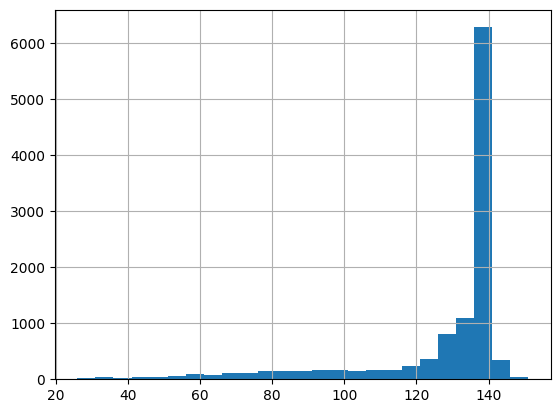

In [11]:
# Let's see the length of the tweets
seq_length = [len(i) for i in df['text']]

pd.Series(seq_length).hist(bins = 25)

<ipython-input-12-ece6023d4ced>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




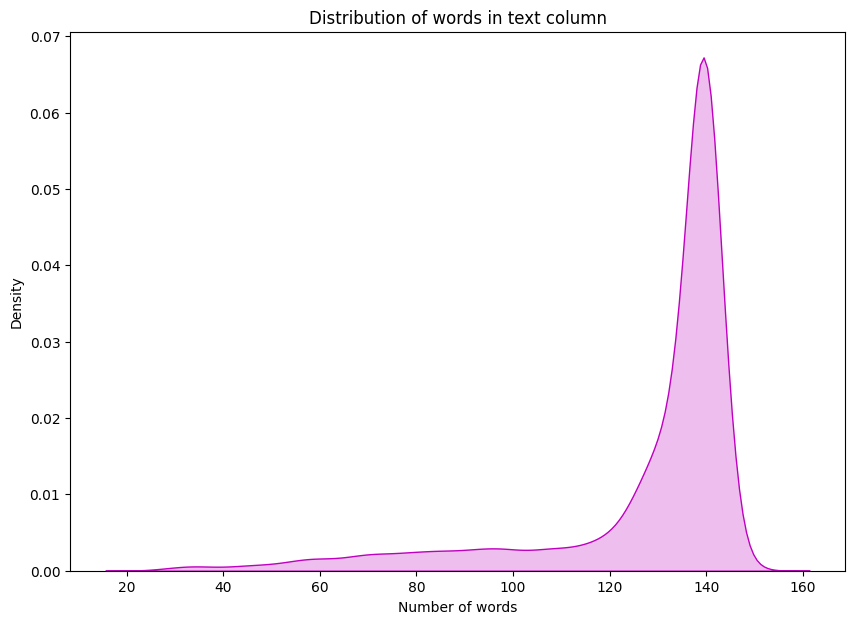

In [12]:
df["num of words in text"] = df["text"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(df["num of words in text"],shade=True, color='m')
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

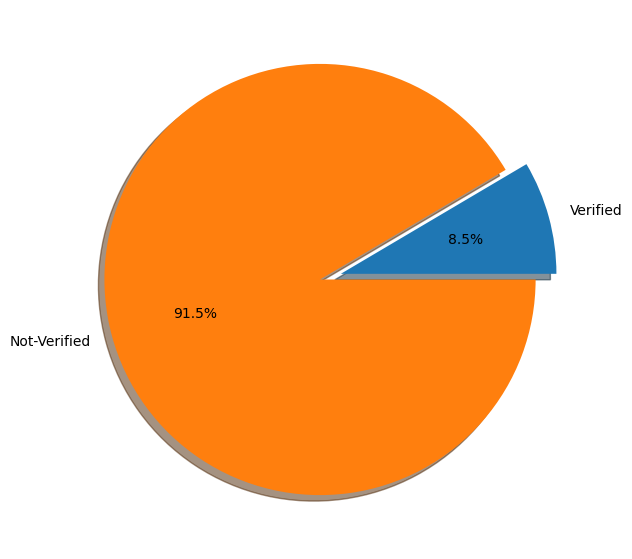

In [13]:
dict_ = df['user_verified'].value_counts().to_dict()
dict_['Verified'] = dict_.pop(True)
dict_['Not-Verified'] = dict_.pop(False)

plt.figure(figsize=(7,7))
plt.pie(x=dict_.values(), labels=dict_.keys(), autopct='%1.1f%%', shadow=True, startangle=0, explode = [0.1, 0])
plt.show()


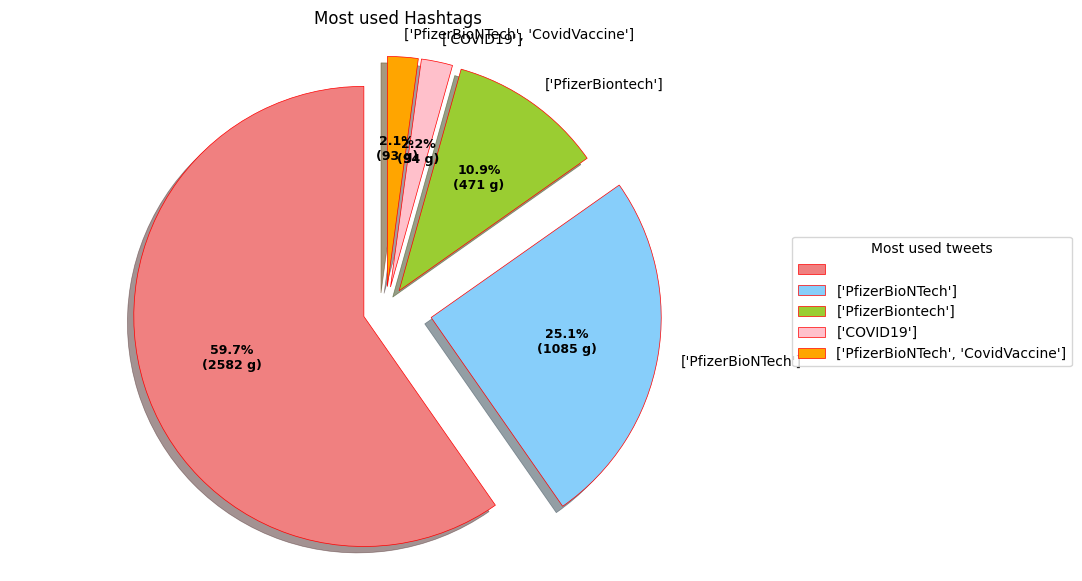

In [14]:
MostUsedTweets = df.hashtags.value_counts().sort_values(ascending=False)[:5]
colors = ['lightcoral', 'lightskyblue', 'yellowgreen', 'pink', 'orange']
explode = (0.1, 0.2, 0.1, 0.1, 0.1)

# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "red" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating the plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(MostUsedTweets,
                                  autopct = lambda pct: func(pct, MostUsedTweets),
                                  explode = explode,
                                  labels = MostUsedTweets.keys(),
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, MostUsedTweets.keys(),
          title ="Most used tweets",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))


plt.setp(autotexts, size=9, weight="bold")
ax.set_title("Most used Hashtags")
plt.axis('equal')
plt.show()

In [15]:
df.head()

user_name              user_location  \
0            Rachel Roh  La Crescenta-Montrose, CA   
1           Albert Fong          San Francisco, CA   
2              eli🇱🇹🇪🇺👌                   Your Bed   
3         Charles Adler     Vancouver, BC - Canada   
4  Citizen News Channel                              

                                    user_description  user_followers  \
0  Aggregator of Asian American news; scanning di...             405   
1  Marketing dude, tech geek, heavy metal & '80s ...             834   
2                                     heil, hydra 🖐☺              10   
3  Hosting "CharlesAdlerTonight" Global News Radi...           49165   
4  Citizen News Channel bringing you an alternati...             152   

   user_friends  user_favourites  user_verified                 date  \
0          1692             3247          False  2020-12-20 06:06:44   
1           666              178          False  2020-12-13 16:27:13   
2            88              155          False  2020-12-12 20:33:45   
3          3933            21853           True  2020-12-12 20:23:59   
4           580             1473          False  2020-12-12 20:17:19   

                                                text  \
0  Same folks said daikon paste could treat a cyt...   
1  While the world has been on the wrong side of ...   
2  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  Facts are immutable, Senator, even when you're...   
4  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                         Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                         Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  num of words in text  
0         0          0       False                    97  
1         1          1       False                   140  
2         0          0       False                   140  
3       446       2129       False                   140  
4         0          0       False                   135

In [16]:
import plotly.graph_objects as go

# Count the number of tweets per day and reset index
tweet_date = df['date'].value_counts().to_frame().reset_index()

# Manually rename the columns
tweet_date.columns = ['date', 'count']  # Directly set the column names

# Convert 'date' to datetime format
tweet_date['date'] = pd.to_datetime(tweet_date['date'])

# Sort by date in ascending order
tweet_date = tweet_date.sort_values('date', ascending=False)

# Create the plot
fig = go.Figure(go.Scatter(
    x=tweet_date['date'],
    y=tweet_date['count'],
    mode='markers+lines',
    name="Submissions",
    marker_color='dodgerblue'
))

# Update the layout with the correct title
fig.update_layout(
    title_text='Tweets per Day : ({} - {})'.format(
        tweet_date['date'].min().strftime("%d/%m/%Y"),
        tweet_date['date'].max().strftime("%d/%m/%Y")
    ),
    template="plotly_dark",
    title_x=0.5
)

# Show the plot
fig.show()


<ipython-input-17-4bf55f553652>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




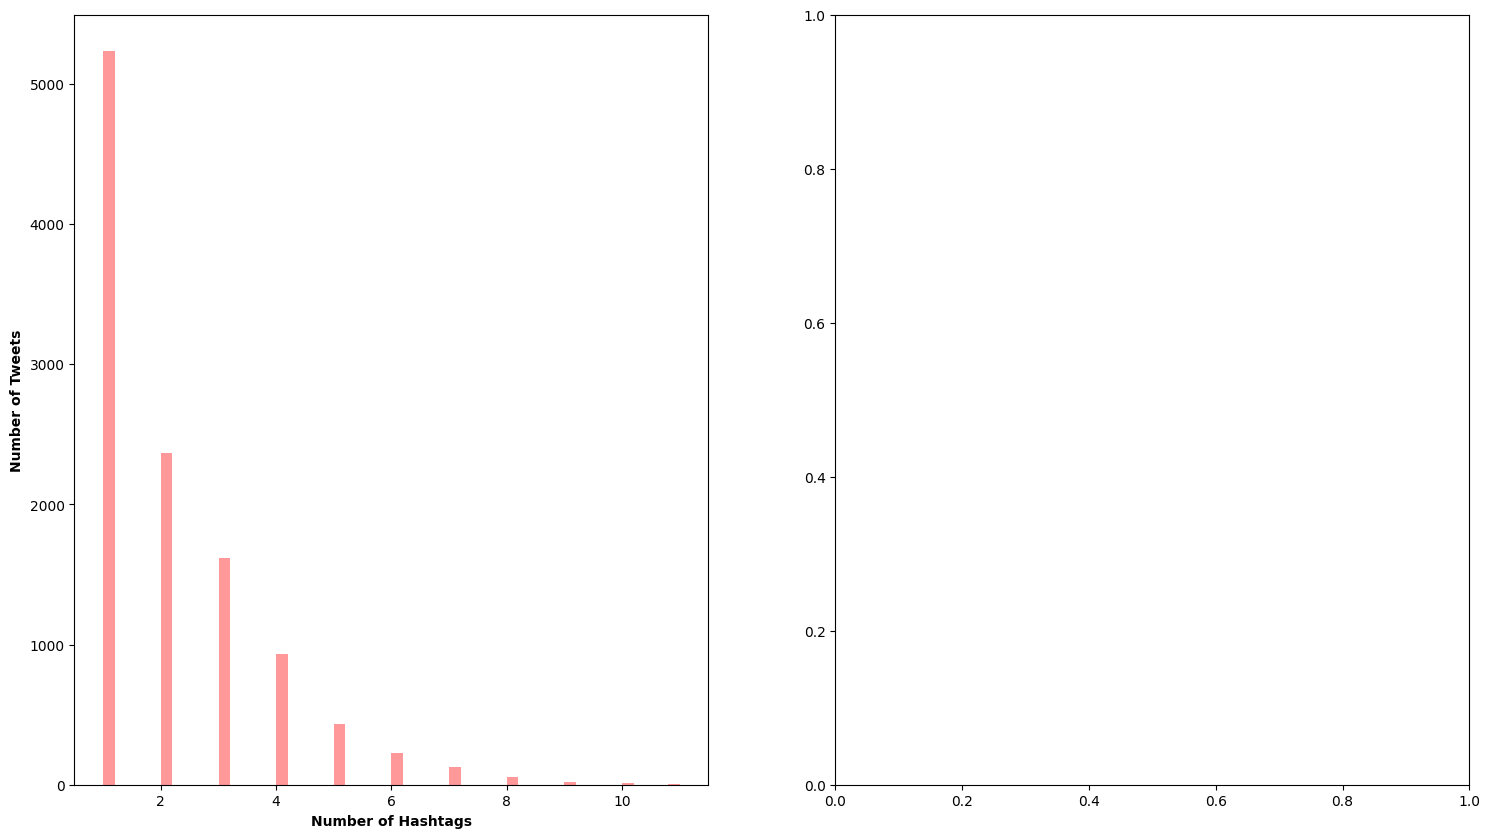

In [17]:
fig, ax = plt.subplots(1,2, figsize=(18, 10))

sns.distplot(df['hashtags'].dropna().apply(lambda x: len(x.split(','))).tolist(), kde=False, ax=ax[0], color='red')
ax[0].set_xlabel("Number of Hashtags", weight='bold')
ax[0].set_ylabel('Number of Tweets', weight='bold')

plt.show()

<Axes: title={'center': 'Day with maximun tweets'}, xlabel='count', ylabel='day'>

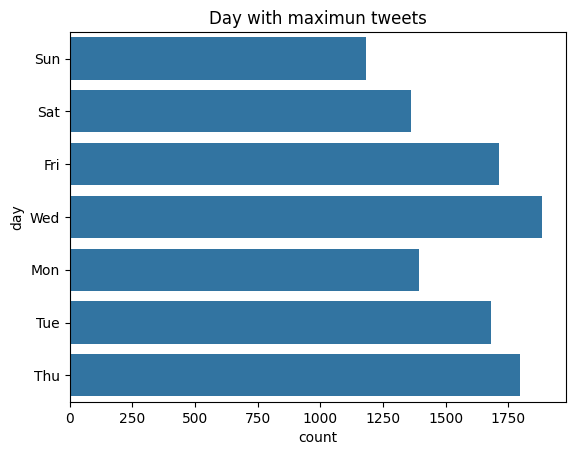

In [18]:
df["date"] = pd.to_datetime(df["date"])
df["Month"] = df["date"].apply(lambda x : x.month)
df["day"] = df["date"].apply(lambda x : x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["day"] = df["day"].map(dmap)
plt.title("Day with maximun tweets")
sns.countplot(df["day"])

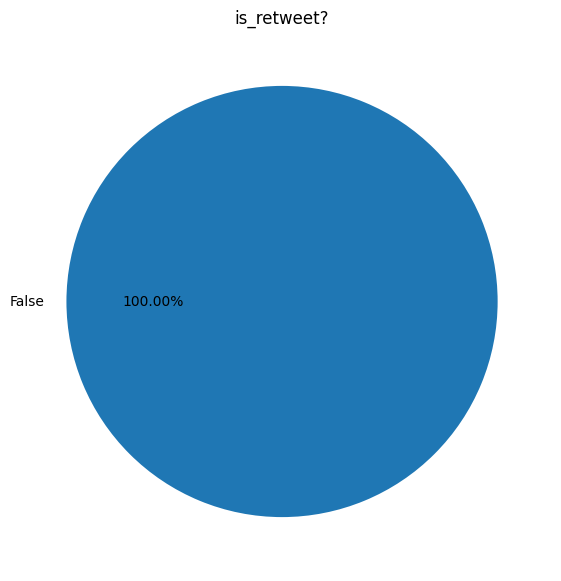

In [19]:
from collections import Counter
y = df['is_retweet']
fig, ax = plt.subplots(figsize=(7, 7))
count = Counter(y)
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('is_retweet?')
plt.show()

<ipython-input-20-715333b63ee9>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




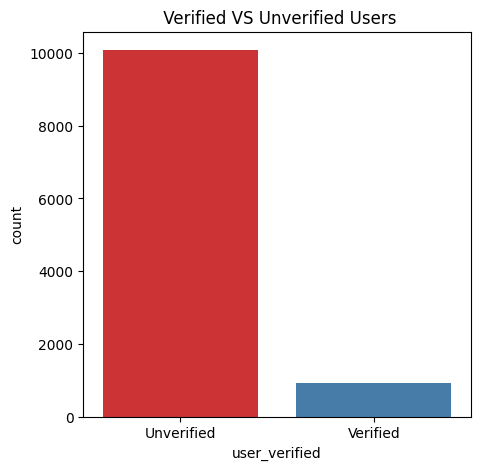

In [20]:
plt.figure(figsize=(5, 5))
sns.countplot(x ="user_verified",data=df, palette="Set1")
plt.title(" Verified VS Unverified Users")
plt.xticks([False,True],['Unverified','Verified'])
plt.show()

In [63]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# def split_hashtags(x):
#     # Convert the string of hashtags into a list, removing brackets and spaces
#     return str(x).replace('[', '').replace(']', '').split(',')

# # Assuming df is already defined
# df = df.copy()
# df['hashtag'] = df['hashtags'].apply(lambda row: split_hashtags(row))

# # "Explode" the list of hashtags into separate rows
# df = df.explode('hashtag')

# # Clean the hashtags by stripping quotes, converting to lowercase, and removing extra spaces
# df['hashtag'] = df['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')

# # Handle empty hashtags (those that might have been misinterpreted or are missing)
# df['hashtag'] = df['hashtag'].fillna('no_hashtag')  # Fill NaN values with 'no_hashtag'
# df.loc[df['hashtag'] == '', 'hashtag'] = 'no_hashtag'  # Ensure empty strings are replaced

# # Count the occurrences of each hashtag
# ds = df['hashtag'].value_counts().reset_index()
# ds.columns = ['hashtag', 'count']

# # Sort the hashtags by their counts in descending order
# ds = ds.sort_values(['count'], ascending=False)

# # Create a bar plot of the top 10 hashtags
# plt.figure(figsize=(10, 6))
# sns.barplot(
#     x=ds.head(10)["count"],
#     y=ds.head(10)['hashtag'],
#     orientation='horizontal'
# ).set_title('Top 10 Hashtags')

# # Display the plot
# plt.show()


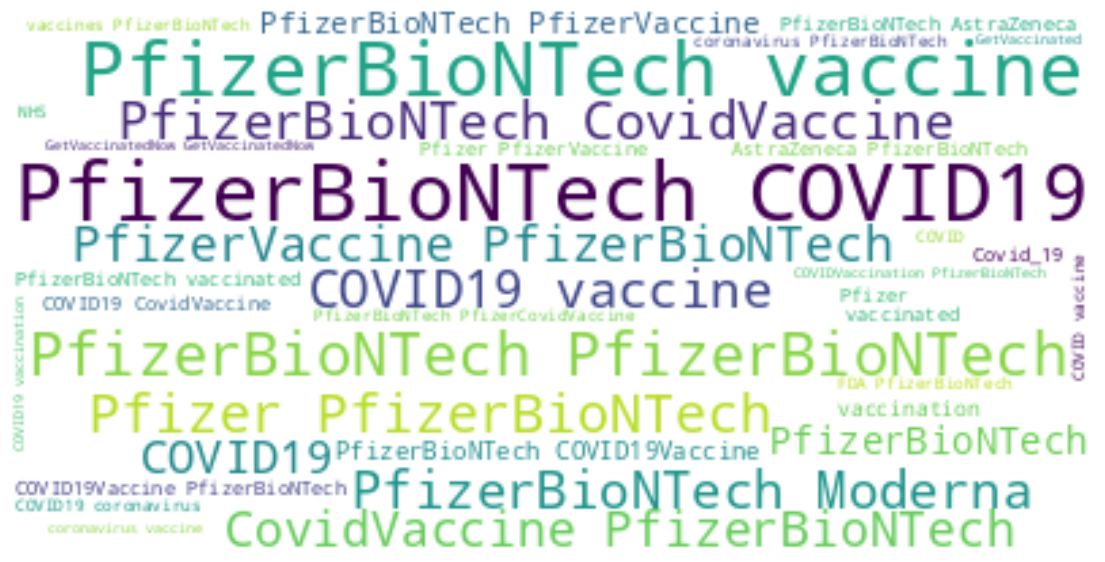

In [22]:
import itertools
from wordcloud import WordCloud

list_hashtags = df['hashtags'].dropna().str.lstrip('[').str.rstrip(']').str.replace("'", "").str.split(', ').tolist()
list_hashtags = list(itertools.chain(*list_hashtags))

plt.figure(figsize=(14,10))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(list_hashtags))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40,
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

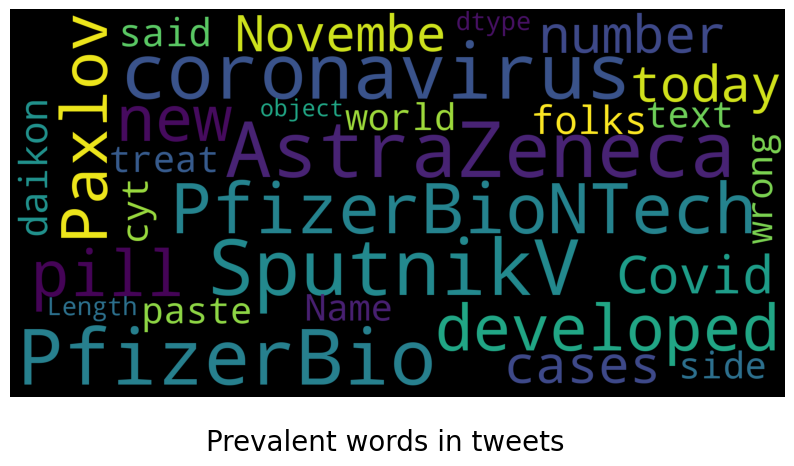

In [26]:
show_wordcloud(df['text'], title = 'Prevalent words in tweets')

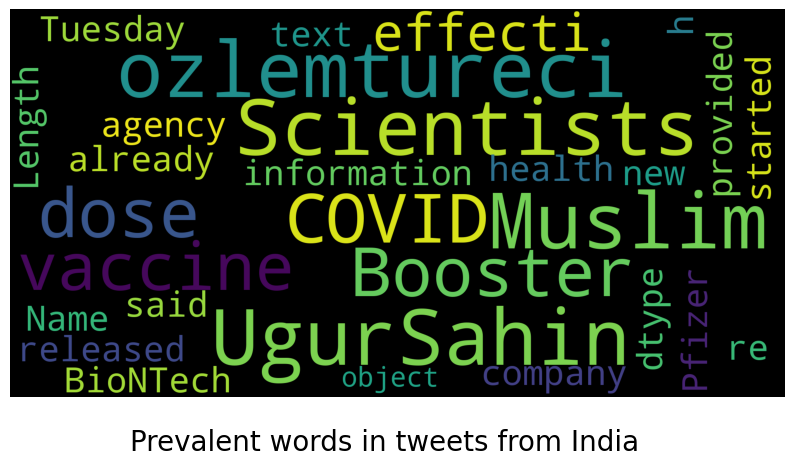

In [27]:
india_df = df.loc[df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

In [28]:
text_list = df["text"].to_list()
text = ""
for i in text_list:
    text = text + i.split("https:")[0]

text = text.replace(" ",",")
text = re.sub("[\@\#\n\.\…\?\\\'\d\)\(\%\*]", ",", text)
text = re.sub(",{2,}", ",", text)

text[:1000]

'Same,folks,said,daikon,paste,could,treat,a,cytokine,storm,PfizerBioNTech,While,the,world,has,been,on,the,wrong,side,of,history,this,year,hopefully,the,biggest,vaccination,effort,we,ve,ev,coronavirus,SputnikV,AstraZeneca,PfizerBioNTech,Moderna,Covid_,Russian,vaccine,is,created,to,last,-,years,coronavirus,SputnikV,AstraZeneca,PfizerBioNTech,Moderna,Covid_,Russian,vaccine,is,created,to,last,-,years,coronavirus,SputnikV,AstraZeneca,PfizerBioNTech,Moderna,Covid_,Russian,vaccine,is,created,to,last,-,years,coronavirus,SputnikV,AstraZeneca,PfizerBioNTech,Moderna,Covid_,Russian,vaccine,is,created,to,last,-,years,coronavirus,SputnikV,AstraZeneca,PfizerBioNTech,Moderna,Covid_,Russian,vaccine,is,created,to,last,-,years,coronavirus,SputnikV,AstraZeneca,PfizerBioNTech,Moderna,Covid_,Russian,vaccine,is,created,to,last,-,years,Facts,are,immutable,Senator,even,when,you,re,not,ethically,sturdy,enough,to,acknowledge,them,You,were,born,i,Explain,to,me,again,why,we,need,a,vaccine,BorisJohnson,MattHancock,

In [29]:
text = text.split(',')
text[:10]


['Same',
 'folks',
 'said',
 'daikon',
 'paste',
 'could',
 'treat',
 'a',
 'cytokine',
 'storm']

<Axes: xlabel='Samples', ylabel='Counts'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 128137 (\N{SYRINGE}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128137 (\N{SYRINGE}) missing from font(s) DejaVu Sans.



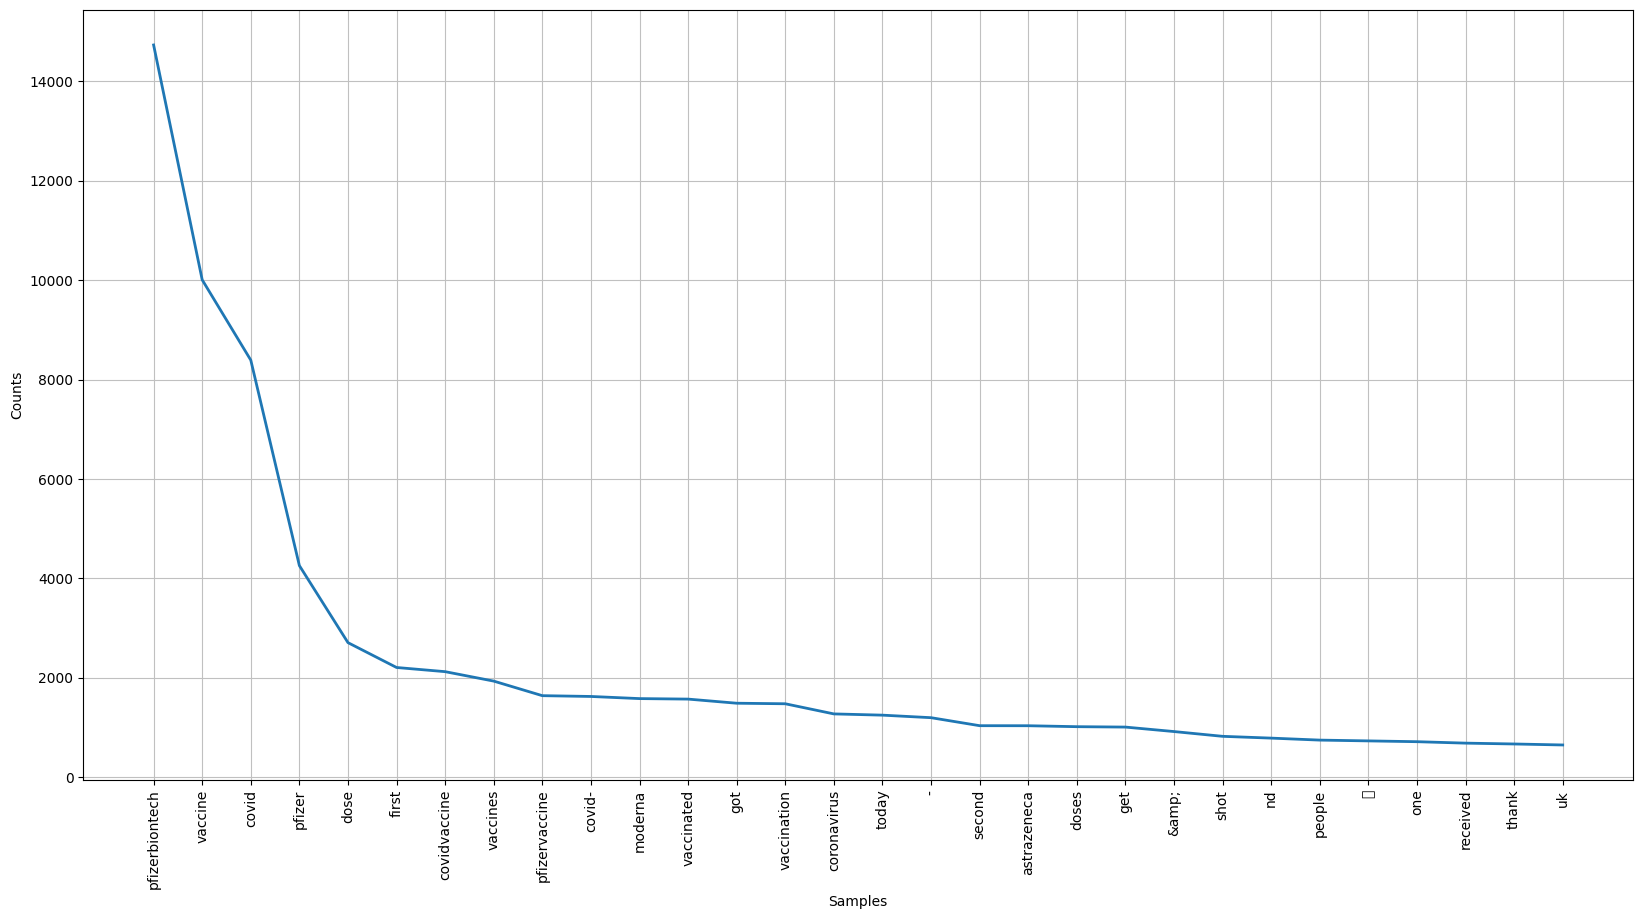

In [30]:
import re
from wordcloud import WordCloud
import nltk
import string
from nltk.corpus import stopwords
from nltk.probability import FreqDist

def stop_w(x):
    new_s = []
    for i in text:
        if i.lower() not in stopwords.words("english"):
            new_s.append(i.lower())
    return new_s

text = stop_w(text)

plt.figure(figsize=(20,10))
FreqDist(text).plot(30)

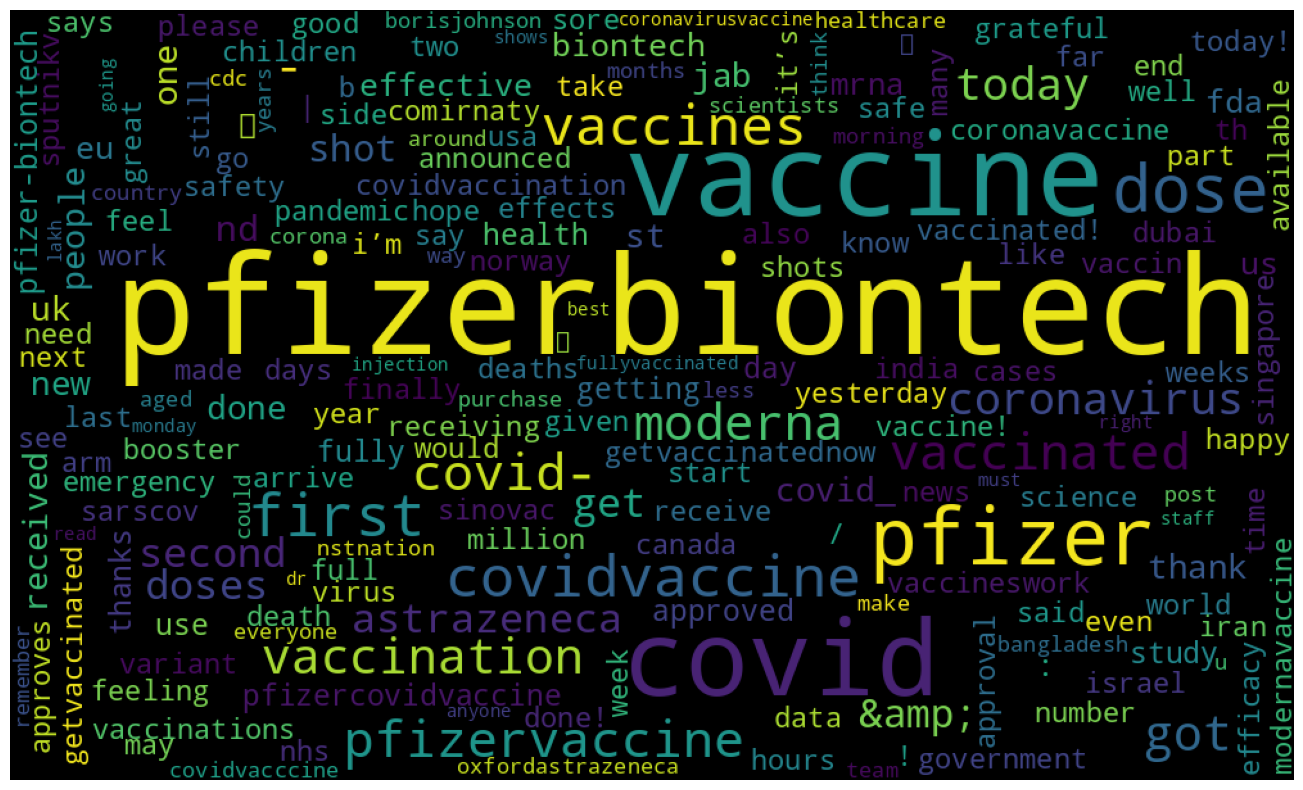

In [31]:
text_count = pd.Series(text).value_counts()
wc = WordCloud(width=1000, height=600, background_color="black", random_state=0)
plt.figure(figsize=(20,10),facecolor='w')
plt.imshow(wc.generate_from_frequencies(text_count))
plt.axis("off")
plt.show()

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
%matplotlib inline




In [33]:
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import random
plt.rc('figure',figsize=(17,13))



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [34]:
data = pd.read_csv('/kaggle/input/pfizer-vaccine-tweets/vaccination_tweets.csv').fillna('')

In [35]:
stop_words = (set(stopwords.words('english')))
sno = SnowballStemmer('english')

def remove_html_tags(sentence):
    regex = re.compile(pattern='<.*?>')
    clean_text = re.sub(regex, ' ', sentence)
    return clean_text

def remove_punctuations(word):
    cleaned_sentence = re.sub(pattern=r'[?|!|\|"|#|\']', repl=r'', string=word)
    cleaned_sentence = re.sub(pattern=r'[.|,|)|(|\|/]', repl=r'', string=cleaned_sentence)
    return cleaned_sentence

def get_preprocessed_data(data, feature, cleaned_feature):

        i = 0
        final_string = []

        sentences = data[feature].values
        for sentence in sentences:
            filtered_sentence = []
            sentence = remove_html_tags(sentence)
            for word in sentence.split():
                for clean_word in remove_punctuations(word).split():
                    if clean_word.isalpha() and len(clean_word) > 2:
                        if clean_word.lower() not in stop_words:
                            s = (sno.stem(clean_word.lower()))
                            filtered_sentence.append(s)

            string = " ".join(filtered_sentence)
            final_string.append(string)
            i += 1
        data[cleaned_feature] = final_string
        return data

data = get_preprocessed_data(data, 'text', 'Tidy Tweet')
data = get_preprocessed_data(data, 'hashtags', 'Tidy hashtags')

Sentiment
Neutral     6071
Positive    3484
Negative    1465
Name: count, dtype: int64


<ipython-input-36-f37681269052>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




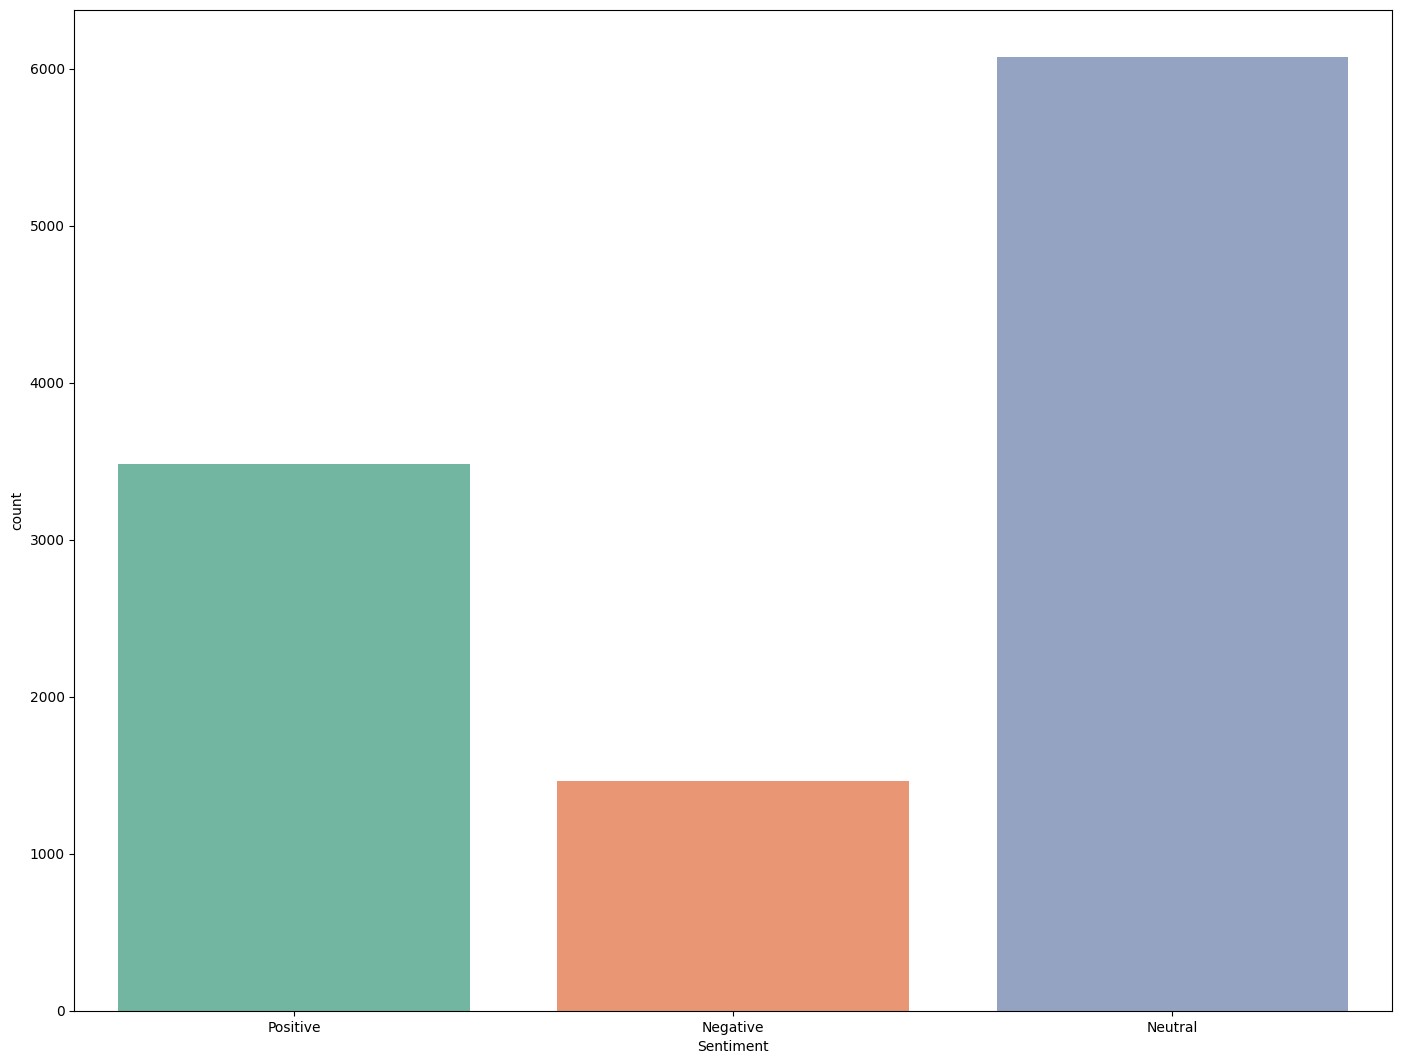

In [36]:
sentiment = SentimentIntensityAnalyzer()
def get_sentiment(data):
    sentiment_list = []
    for text in list(data['Tidy Tweet'].values):
        if sentiment.polarity_scores(text)["compound"] > 0:
            sentiment_list.append("Positive")
        elif sentiment.polarity_scores(text)["compound"] < 0:
            sentiment_list.append("Negative")
        else:
            sentiment_list.append("Neutral")
    return sentiment_list

data['Sentiment'] = get_sentiment(data)
sns.countplot(x="Sentiment", data=data, palette="Set2")
print(data.Sentiment.value_counts())

In [37]:
def get_word_cloud(sentiment):
    stop_words = (set(stopwords.words('english')))
    remove_words = ['vaccin', 'pfizerbiontech', 'coronavirus', 'pfizer', 'covid', 'covidvaccin', 'pfizervaccin']
    stop_words = remove_words + list(stop_words)
    plt.figure(figsize=[15,15])
    clean_tweets= "".join(list(data[data['Sentiment']==sentiment]['Tidy Tweet'].values))
    wordcloud = WordCloud(width=700,height=400, background_color='white',colormap='plasma', max_words=50, stopwords=stop_words, collocations=False).generate(clean_tweets)
    plt.title(f"Top 50 {sentiment} words used in tweets", fontsize=20)
    plt.imshow(wordcloud)
    return plt.show()

<Axes: title={'center': 'Tweet count over a period of time'}, xlabel='Date', ylabel='Count'>

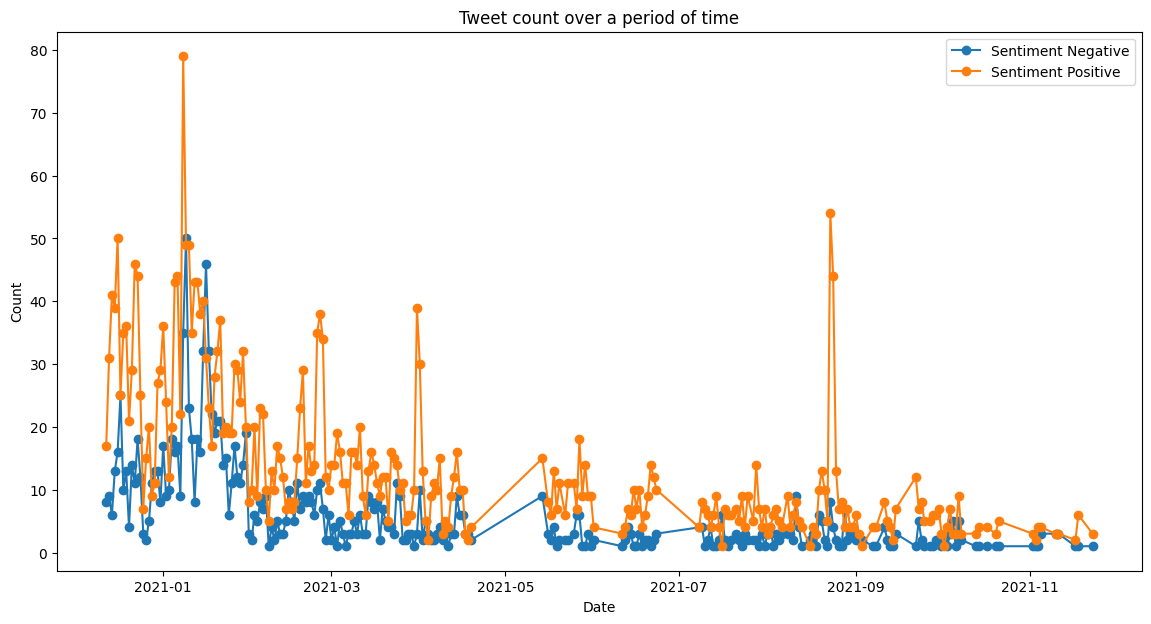

In [38]:
data['date'] = pd.to_datetime(data['date']).dt.date
negative_data = data[data['Sentiment']=='Negative'].reset_index()
positive_data = data[data['Sentiment']=='Positive'].reset_index()
grouped_data_neg = negative_data.groupby('date')['Sentiment'].count().reset_index()
grouped_data_pos = positive_data.groupby('date')['Sentiment'].count().reset_index()
merged_data = pd.merge(grouped_data_neg, grouped_data_pos, left_on='date', right_on='date', suffixes=(' Negative', ' Positive'))

merged_data.plot(x='date', y=['Sentiment Negative', 'Sentiment Positive'], figsize=(14, 7), marker='o', xlabel='Date', ylabel='Count', title='Tweet count over a period of time')

In [39]:

data.text = data.text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
data.text = data.text.apply(lambda x:re.sub(r'\B#\S+','',x))


# Remove URLS
data.text = data.text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
data.text = data.text.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
data.text = data.text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
data.text = data.text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [40]:
sid = SIA()
data['sentiments']           = data['text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
data['Positive Sentiment']   = data['sentiments'].apply(lambda x: x['pos']+1*(10**-6))
data['Neutral Sentiment']    = data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
data['Negative Sentiment']   = data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

data.drop(columns=['sentiments'],inplace=True)

In [41]:
data.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                              

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified        date  \
0             405          1692             3247          False  2020-12-20   
1             834           666              178          False  2020-12-13   
2              10            88              155          False  2020-12-12   
3           49165          3933            21853           True  2020-12-12   
4             152           580             1473          False  2020-12-12   

   ...               source retweets favorites  is_retweet  \
0  ...  Twitter for Android        0         0       False   
1  ...      Twitter Web App        1         1       False   
2  ...  Twitter for Android        0         0       False   
3  ...      Twitter Web App      446      2129       False   
4  ...   Twitter for iPhone        0         0       False   

                                          Tidy Tweet  \
0  folk said daikon past could treat cytokin stor...   
1  world wrong side histori year hope biggest vac...   
2  coronavirus sputnikv astrazeneca pfizerbiontec...   
3  fact immut senat even your ethic sturdi enough...   
4        explain need vaccin whereareallthesickpeopl   

                                 Tidy hashtags Sentiment Positive Sentiment  \
0                                               Positive           0.000001   
1                                               Negative           0.109001   
2  sputnikv astrazeneca pfizerbiontech moderna   Neutral           0.250001   
3                                                Neutral           0.000001   
4                                                Neutral           0.000001   

  Neutral Sentiment  Negative Sentiment  
0          1.000001            0.000001  
1          0.766001            0.125001  
2          0.750001            0.000001  
3          1.000001            0.000001  
4          1.000001            0.000001  

[5 rows x 22 columns]

In [42]:
#Number of Words
data['Number_Of_Words'] = data.text.apply(lambda x:len(x.split(' ')))
#Average Word Length
data['Mean_Word_Length'] = data.text.apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )

<ipython-input-43-3a419034b22c>:3: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


<ipython-input-43-3a419034b22c>:4: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


<ipython-input-43-3a419034b22c>:5: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


<ipython-input-43-3a419034b22c>:8: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.1`, but please see the docs for the new parameters
an

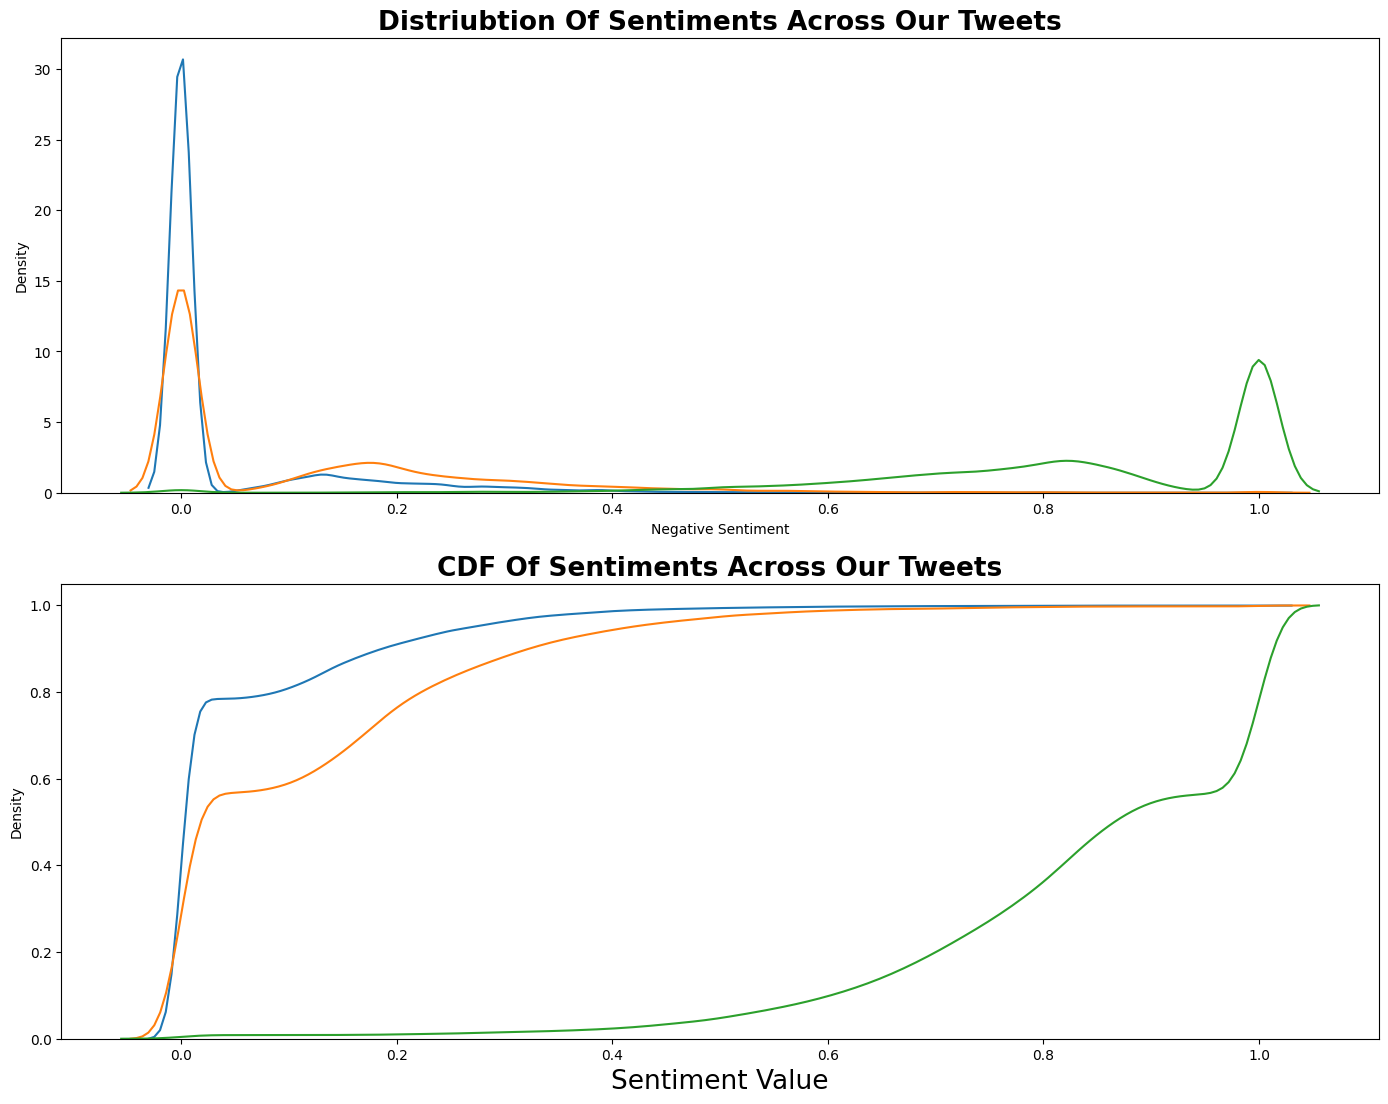

In [43]:
plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(data['Negative Sentiment'],bw=0.1)
sns.kdeplot(data['Positive Sentiment'],bw=0.1)
sns.kdeplot(data['Neutral Sentiment'],bw=0.1)
plt.subplot(2,1,2)
plt.title('CDF Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(data['Negative Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(data['Positive Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(data['Neutral Sentiment'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.show()

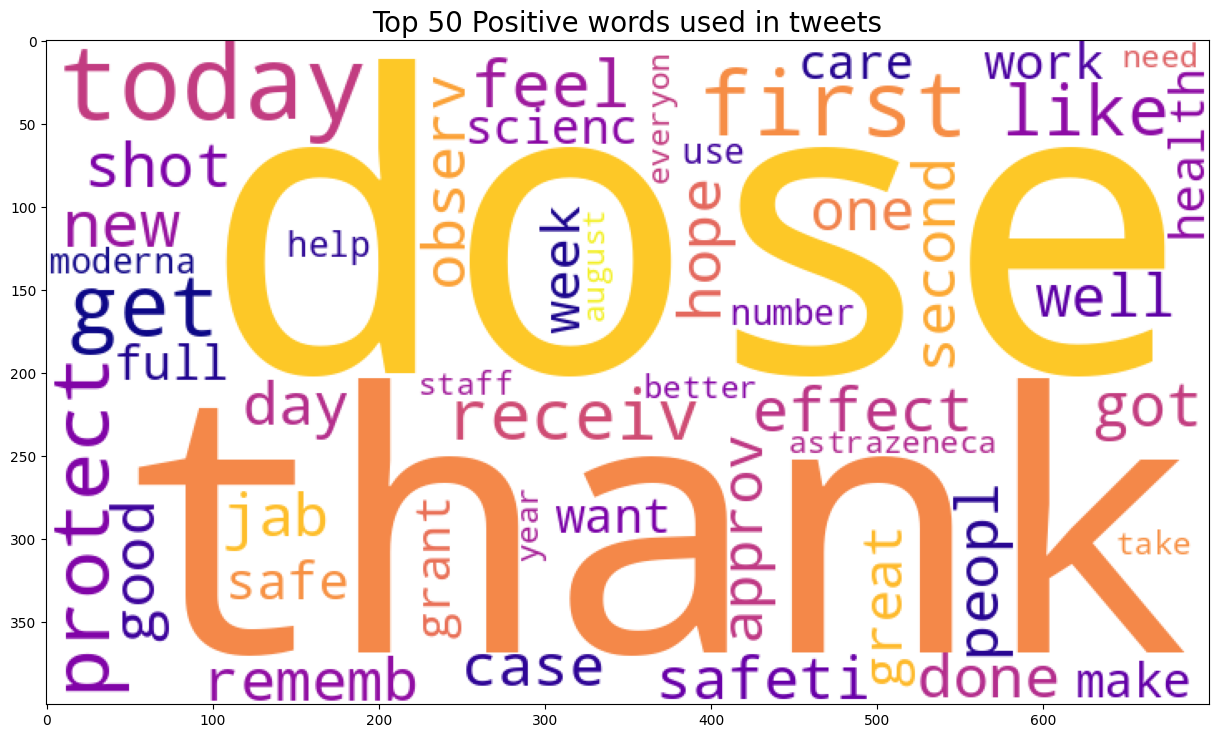

In [44]:
get_word_cloud(sentiment='Positive')


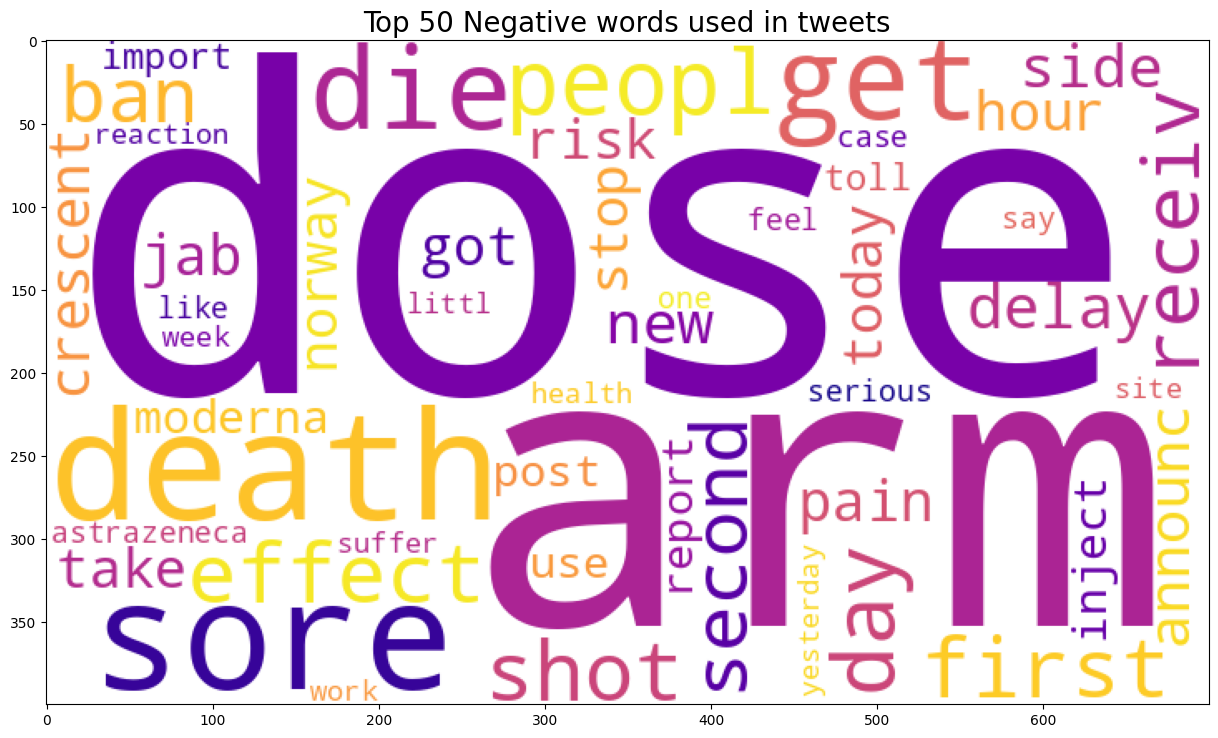

In [45]:
get_word_cloud(sentiment='Negative')


In [46]:
from plotly.subplots import make_subplots


In [48]:
# Ensure 'Positive Sentiment' and 'Negative Sentiment' columns are numeric
data['Positive Sentiment'] = pd.to_numeric(data['Positive Sentiment'], errors='coerce')
data['Negative Sentiment'] = pd.to_numeric(data['Negative Sentiment'], errors='coerce')

# Now group by 'date' and calculate the mean and standard deviation for the numeric columns only
b_date_mean = data.groupby(by='date')[['Positive Sentiment', 'Negative Sentiment']].mean().reset_index()
b_date_std = data.groupby(by='date')[['Positive Sentiment', 'Negative Sentiment']].std().reset_index()


fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Average Positive Sentiment',  'Daily Average Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Positive Sentiment'],name='Positive Sentiment Mean'),
    row=1, col=1
)


#positive mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Positive Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Positive Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean'
)

fig.add_annotation(x=b_date_mean['date'].values[3], y=b_date_mean['Positive Sentiment'].mean(),
            text=r"$\mu : {:.2f}$".format(b_date_mean['Positive Sentiment'].mean()),
            showarrow=True,
            arrowhead=3,
            yshift=10)



fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Negative Sentiment'],name='Negative Sentiment Mean'),
    row=2, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Negative Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2',
        yref='y2'
)

fig.add_annotation(x=b_date_mean['date'].values[3], y=b_date_mean['Negative Sentiment'].mean(),
            text=r"$\mu : {:.2f}$".format(b_date_mean['Negative Sentiment'].mean()),
            showarrow=True,
            arrowhead=3,
            yshift=10,
            xref='x2',
            yref='y2')



fig.add_annotation(x=b_date_mean['date'].values[5], y=b_date_mean['Negative Sentiment'].mean()+0.01,
            text=r"Start Of Decline",
            showarrow=True,
            arrowhead=6,
            yshift=10,
            xref='x2',
            yref='y2')

fig.add_annotation(x=b_date_mean['date'].values[15], y=.024,
            text=r"Start Of Incline",
            showarrow=True,
            arrowhead=6,
            yshift=10,
            xref='x2',
            yref='y2')

fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Average Change With Time")
fig.show()

In [49]:
import plotly.express as ex

In [50]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    return text
data['text'] = data['text'].apply(lambda x:clean_text(x))

In [51]:
data['text']


0        same folks said daikon paste could treatcytoki...
1        while the world has been on the wrong side of ...
2             russian vaccine is created to last 2 4 years
3        facts are immutable senator even when you re n...
4                   explain to me again why we needvaccine
                               ...                        
11015    the number of covid 19 cases today 17 november...
11016                                           first dose
11017    the number of covid 19 cases today 16 november...
11018    has developed new pill that increased the chan...
11019    the number of covid 19 cases today 15 november...
Name: text, Length: 11020, dtype: object

In [52]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [53]:
df=pd.DataFrame()
df['text']=data['text']
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['text'].apply(lambda x: tokenization(x.lower()))
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['No_stopwords'] = df['tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming1(text):
    text = [ps.stem(word) for word in text]
    return text

df['stemmed_porter'] = df['No_stopwords'].apply(lambda x: stemming1(x))

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
def stemming2(text):
    text = [s_stemmer.stem(word) for word in text]
    return text
df['stemmed_snowball'] = df['No_stopwords'].apply(lambda x: stemming2(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['No_stopwords'].apply(lambda x: lemmatizer(x))

In [54]:
df.head()


text  \
0  same folks said daikon paste could treatcytoki...   
1  while the world has been on the wrong side of ...   
2       russian vaccine is created to last 2 4 years   
3  facts are immutable senator even when you re n...   
4             explain to me again why we needvaccine   

                                           tokenized  \
0  [same, folks, said, daikon, paste, could, trea...   
1  [while, the, world, has, been, on, the, wrong,...   
2  [russian, vaccine, is, created, to, last, 2, 4...   
3  [facts, are, immutable, senator, even, when, y...   
4     [explain, to, me, again, why, we, needvaccine]   

                                        No_stopwords  \
0  [folks, said, daikon, paste, could, treatcytok...   
1  [world, wrong, side, history, year, hopefully,...   
2     [russian, vaccine, created, last, 2, 4, years]   
3  [facts, immutable, senator, even, ethically, s...   
4                             [explain, needvaccine]   

                                      stemmed_porter  \
0  [folk, said, daikon, past, could, treatcytokin...   
1  [world, wrong, side, histori, year, hope, bigg...   
2         [russian, vaccin, creat, last, 2, 4, year]   
3  [fact, immut, senat, even, ethic, sturdi, enou...   
4                              [explain, needvaccin]   

                                    stemmed_snowball  \
0  [folk, said, daikon, past, could, treatcytokin...   
1  [world, wrong, side, histori, year, hope, bigg...   
2         [russian, vaccin, creat, last, 2, 4, year]   
3  [fact, immut, senat, even, ethic, sturdi, enou...   
4                              [explain, needvaccin]   

                                          lemmatized  
0  [folk, said, daikon, paste, could, treatcytoki...  
1  [world, wrong, side, history, year, hopefully,...  
2      [russian, vaccine, created, last, 2, 4, year]  
3  [fact, immutable, senator, even, ethically, st...  
4                             [explain, needvaccine]

In [55]:
data['text']=df['lemmatized']
data.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                              

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified        date  \
0             405          1692             3247          False  2020-12-20   
1             834           666              178          False  2020-12-13   
2              10            88              155          False  2020-12-12   
3           49165          3933            21853           True  2020-12-12   
4             152           580             1473          False  2020-12-12   

   ... favorites is_retweet  \
0  ...         0      False   
1  ...         1      False   
2  ...         0      False   
3  ...      2129      False   
4  ...         0      False   

                                          Tidy Tweet  \
0  folk said daikon past could treat cytokin stor...   
1  world wrong side histori year hope biggest vac...   
2  coronavirus sputnikv astrazeneca pfizerbiontec...   
3  fact immut senat even your ethic sturdi enough...   
4        explain need vaccin whereareallthesickpeopl   

                                 Tidy hashtags  Sentiment  Positive Sentiment  \
0                                                Positive            0.000001   
1                                                Negative            0.109001   
2  sputnikv astrazeneca pfizerbiontech moderna    Neutral            0.250001   
3                                                 Neutral            0.000001   
4                                                 Neutral            0.000001   

  Neutral Sentiment Negative Sentiment Number_Of_Words  Mean_Word_Length  
0          1.000001           0.000001               8              5.88  
1          0.766001           0.125001              21              4.43  
2          0.750001           0.000001               9              4.00  
3          1.000001           0.000001              20              4.55  
4          1.000001           0.000001               7              4.57  

[5 rows x 24 columns]

In [56]:
temp = data.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Greens')


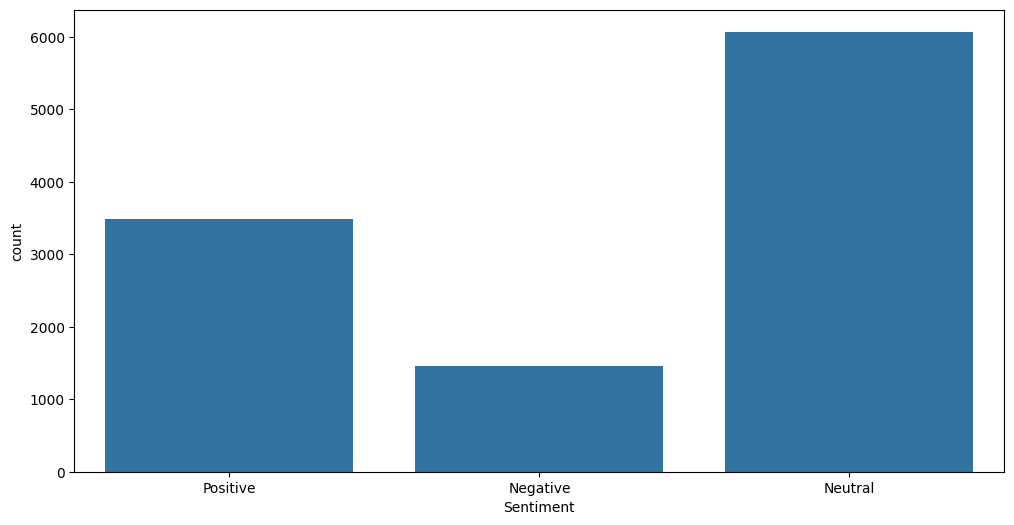

In [57]:

plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=data)
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [58]:
from matplotlib import rcParams


<ipython-input-59-f89d90dfb6ba>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-59-f89d90dfb6ba>:2: UserWarning:


The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.

<ipython-input-59-f89d90dfb6ba>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-59-f89d90dfb6ba>:7: UserWarning:


The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.

<ipython-input-59-f89d90dfb6ba>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-

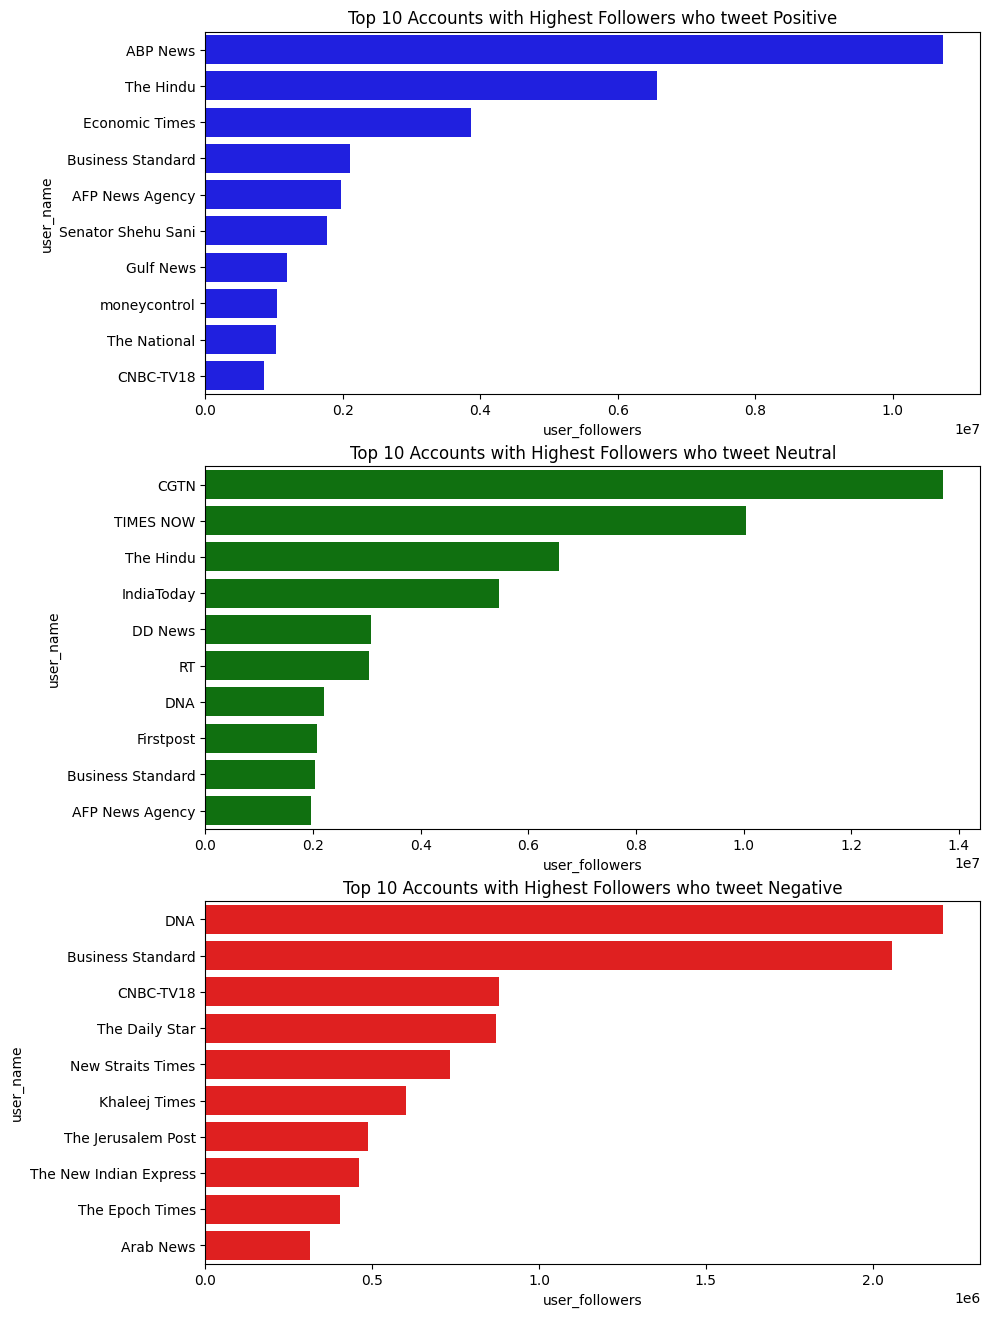

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 16))
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax1, palette=["b"],
           data=data[(data.Sentiment== "Positive")]\
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax1.set_title('Top 10 Accounts with Highest Followers who tweet Positive')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax2, palette=["g"],
           data=data[(data.Sentiment == "Neutral")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax2.set_title('Top 10 Accounts with Highest Followers who tweet Neutral')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax3, palette=["r"],
           data=data[(data.Sentiment == "Negative")]
           .drop_duplicates(subset=["user_name"])\
           .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax3.set_title('Top 10 Accounts with Highest Followers who tweet Negative')

fig.show()

<Figure size 4000x1000 with 0 Axes>

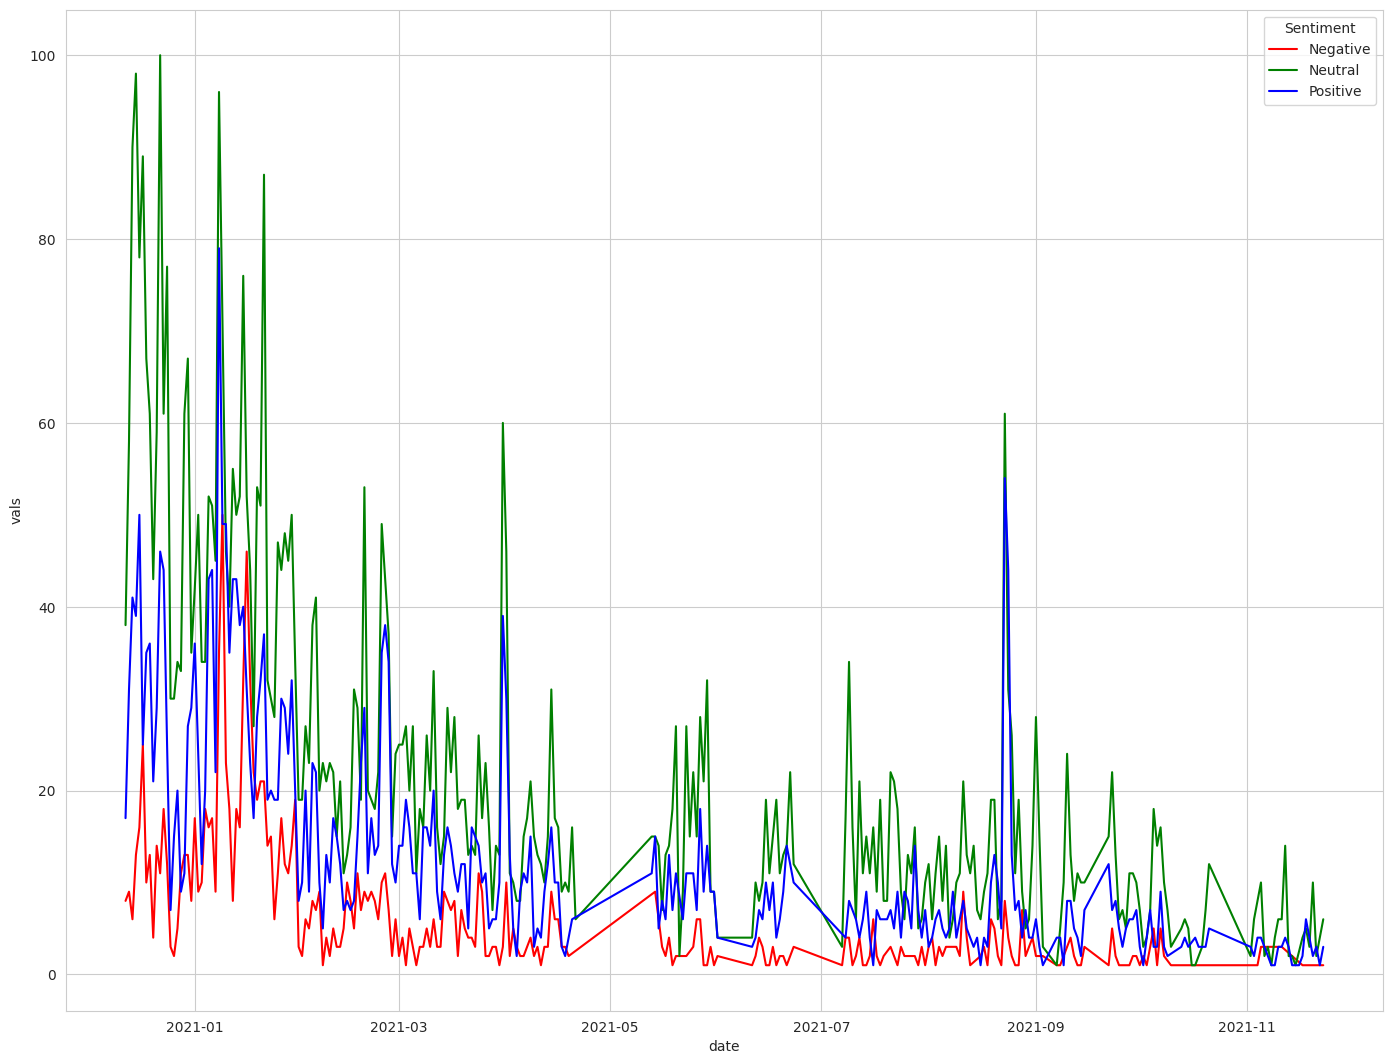

<Figure size 4000x1000 with 0 Axes>

In [60]:
data["date"] = pd.to_datetime(data.date)
timeline = data.resample('D', on='date')["Sentiment"].value_counts().unstack(1)

timeline.reset_index(inplace=True)

timeline = timeline.melt("date", var_name='Sentiment',  value_name='vals')

sns.set_style("whitegrid")
sns.lineplot(x="date", y="vals", hue="Sentiment", data=timeline, palette=["r", "g","b"])
plt.figure(figsize=(40,10))

In [61]:
print("Summary statistics of numerical features : \n", data.describe())


Summary statistics of numerical features : 
                  id  user_followers   user_friends  user_favourites  \
count  1.102000e+04    1.102000e+04   11020.000000     1.102000e+04   
mean   1.372977e+18    3.518827e+04    1170.470236     1.533289e+04   
min    1.337728e+18    0.000000e+00       0.000000     0.000000e+00   
25%    1.347623e+18    1.110000e+02     164.000000     4.360000e+02   
50%    1.360274e+18    4.790000e+02     460.000000     2.323500e+03   
75%    1.395234e+18    2.171250e+03    1221.000000     1.114075e+04   
max    1.463244e+18    1.371493e+07  103226.000000     1.213794e+06   
std    3.311622e+16    2.942509e+05    2798.429673     4.944401e+04   

                                date      retweets     favorites  \
count                          11020  11020.000000  11020.000000   
mean   2021-03-19 05:01:58.911070720      1.360436      7.510617   
min              2020-12-12 00:00:00      0.000000      0.000000   
25%              2021-01-08 00:00:00      0

In [62]:
data['year']         = pd.DatetimeIndex(data['date']).year
import datetime
b_date_count = data.groupby(by='date').count().reset_index()
b_date_count = b_date_count.rename(columns={'id':'Tweets Per Day'})
fig = ex.line(b_date_count,x='date',y='Tweets Per Day')

# fig.add_annotation(x=b_date_mean['date'].values[15], y=.024,
#             text=r"Start Of Incline",
#             showarrow=True,
#             arrowhead=6,
#             yshift=10)


fig.add_shape(type="line",
    x0=b_date_count['date'].values[0], y0=b_date_count['Negative Sentiment'].mean(), x1=b_date_count['date'].values[-1], y1=b_date_count['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
)

fig.update_traces(mode="markers+lines")
fig.update_layout(hovermode="x unified")


###annots
b_date_count.date = pd.to_datetime(b_date_count.date)
b_date_count_dt = b_date_count.set_index('date')
fig.add_annotation(x=datetime.datetime(2021,2,19), y=b_date_count_dt.loc[pd.Timestamp('2021-02-19'),'year'],
            text=r"Israeli study finds Pfizer vaccine 85% effective after first shot",
            showarrow=True,
            arrowhead=3,
            yshift=5,bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2021,1,29), y=b_date_count_dt.loc[pd.Timestamp('2021-01-29'),'year'],
            text=r"vaccine found to be effective against variant discovered in U.K.",
            showarrow=True,
            arrowhead=3,
            yshift=5,ay=-160,bordercolor="#c7c7c7")
fig.add_annotation(x=datetime.datetime(2021,1,8), y=b_date_count_dt.loc[pd.Timestamp('2021-01-8'),'year'],
            text=r"Commission proposes to purchase up to 300 million additional doses of BioNTech-Pfizer vaccine",
            showarrow=True,
            arrowhead=3,
            yshift=5,ay=-30,bordercolor="#c7c7c7")

fig.add_annotation(x=datetime.datetime(2021,1,20), y=b_date_count_dt.loc[pd.Timestamp('2021-01-20'),'year'],
            text=r"The presidency of Joe Biden began",
            showarrow=True,
            arrowhead=3,
            yshift=3,ay=120,bordercolor="#c7c7c7")

fig.update_layout(title='<b> TREND ANALYSIS OF TWEETS WITH EVENTS ASSOCIATED TO THAT PARTICULAR DATE <b>',width=1200)
fig.show()